<a href="https://colab.research.google.com/github/gabecoelho/CS410-CourseProject/blob/main/CS410_Sentiment_Analysis_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Data - Business Review Sentiment Analysis

## 1. Topics to be explored

1. Business categories
2. Number of stars in reviews
3. Number of businesses open and closed
4. Sentiment analysis on all reviews

## 2. Start by downloading files and importing libraries for reading the data

In [1]:
# Download files

# Business data
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vCSG6KgUYo0wpn2_8-tb0YZhMgY4wk1h' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vCSG6KgUYo0wpn2_8-tb0YZhMgY4wk1h" -O yelp_businesses.json && rm -rf /tmp/cookies.txt

# Reviews data
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GuxASYHSWWtGhaCJeh57WCA3RKsjJzaO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1GuxASYHSWWtGhaCJeh57WCA3RKsjJzaO" -O yelp_reviews.json && rm -rf /tmp/cookies.txt


yelp_businesses.jso 100%[===================>] 113.36M   128MB/s    in 0.9s    
yelp_reviews.json   100%[===================>]   4.97G   129MB/s    in 53s     


In [2]:
# General data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Reviews data types
review_dtypes = {
    'stars': np.float16
}

business_dtypes = {
    'is_open': np.bool8
}

reviews_data = pd.read_json('yelp_reviews.json',
                            lines=True,
                            chunksize=2000,
                            dtype=review_dtypes,
                            orient='records')

business_df = pd.read_json('yelp_businesses.json',
                           lines=True,
                           dtype=business_dtypes)


### Only looking at data from 2018 and beyond

In [3]:
# Reviews chunk storage
reviews_chunks = []

for chunk in reviews_data:
  # Drop unused columns and start from 2018 onward
  min_chunk = chunk.drop(columns=['user_id', 'review_id']).query("`date` >= '2018-01-01'")
  reviews_chunks.append(min_chunk)

reviews_df = pd.concat(reviews_chunks, ignore_index=True)

Sample the business data

In [4]:
business_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,False,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,True,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,False,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,True,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,True,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Sample the review data

In [5]:
reviews_df.head(5)

,business_id,stars,useful,funny,cool,text,date
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
3,Zx7n8mdt8OzLRXVzolXNhQ,5.0,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
4,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12


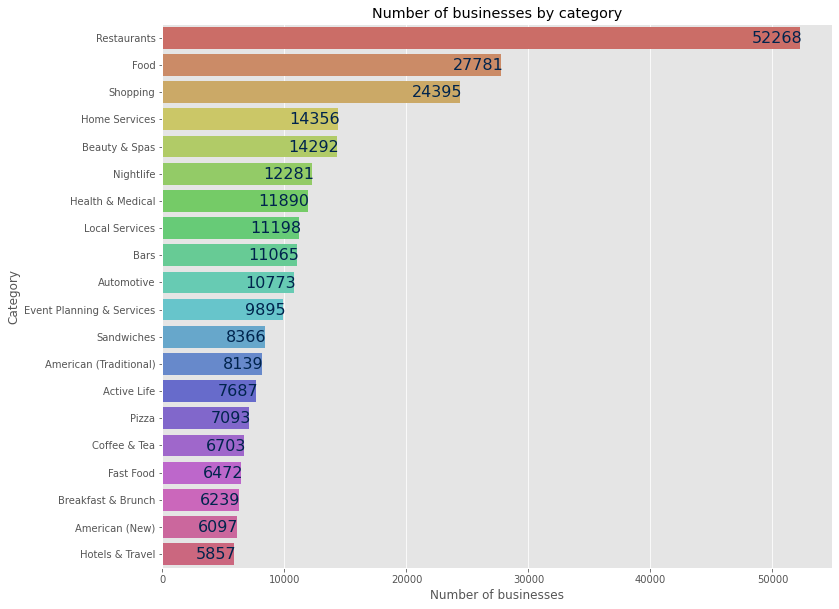

In [6]:
# Join all categories into one large string
joint_categories = ', '.join(business_df['categories'].dropna())

# Make a list with each separate category as an entry
categories = pd.DataFrame(joint_categories.split(', '), columns=['category'])

# Get a series count of unique values
categories_series = categories.category.value_counts()
categories_df = pd.DataFrame(categories_series)

# Use default index
categories_df.reset_index(inplace=True)

# Build plot for visualization
plt.figure(figsize=(12,10))
categories_axis = sns.barplot(y = 'index', x = 'category', data = categories_df.iloc[0:20], palette='hls')
categories_axis.set_ylabel('Category')
categories_axis.set_xlabel('Number of businesses')
categories_axis.set_title('Number of businesses by category')

for p in categories_axis.patches:
    categories_axis.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(2, -16),
                fontsize=16,
                color='#00244d',
                textcoords='offset points',
                horizontalalignment='right')
 
plt.show()   

## 3. Get a count of only restaurant- or food-related categories

In [7]:
related_cats = ['Restaurants', 'Food', 'Bars', 'Sandwiches', 'American (Traditional)', 'Pizza', 'Coffee & Tea', 'Fast Food', 'Breakfast & Brunch', 'American (New)']

# Filter for all the related categories
related_df = categories.where(lambda category : category.isin(related_cats)).dropna()

len(related_df)

140223

## 4. Filter only businesses that are food related

In [8]:
food_businesses = business_df.query("categories in @related_cats")
food_businesses.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3655,x2J-YIFeGZ-nsezzooVA9g,Twenty 21,2005 Market St,Philadelphia,PA,19103,39.954108,-75.174671,3.0,8,False,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,None
4764,mRWlzIJpyQgatq_J7dzxWw,Audubon Aquarium of the Americas - Food Court,1 Canal St,New Orleans,LA,70130,29.950518,-90.063024,2.5,7,True,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",Food,None
5142,KuLi91b-N_0XY_3IA72RJQ,MexiPhilly Food Cart,37TH St And Spruce St,Philadelphia,PA,19104,39.951029,-75.197275,3.5,21,True,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",Food,None
5873,VlrSuulqTFeQfV2PToJGvg,Fung Garden,5118 Gall Blvd,Zephyrhills,FL,33542,28.232059,-82.180394,3.5,8,False,"{'RestaurantsTakeOut': 'True', 'HasTV': 'False...",Restaurants,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
6856,mFE9V6LPpsDRUQLEBsBRRA,Pearl of East,2049 W Oregon Ave,Philadelphia,PA,19145,39.918635,-75.182422,3.0,17,True,"{'RestaurantsGoodForGroups': 'False', 'Busines...",Restaurants,"{'Monday': '10:30-22:30', 'Tuesday': '10:30-22..."


## 5. Plot review stars count

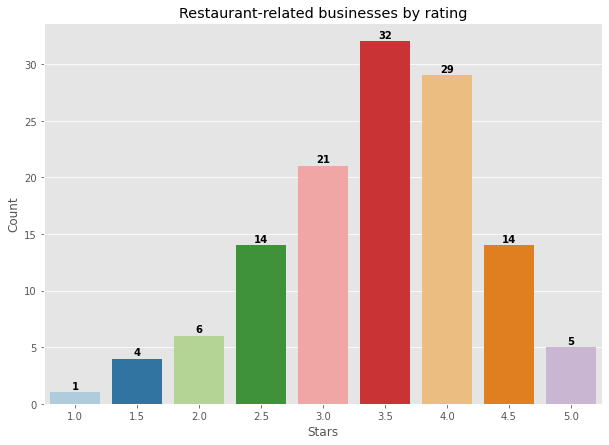

In [9]:
plt.figure(figsize=(10,7))
axis = sns.countplot(x='stars', data = food_businesses, palette='Paired')
axis.set_ylabel('Count')
axis.set_xlabel('Stars')
axis.set_title('Restaurant-related businesses by rating')

for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axis.text(x+width-.4, 
                y+height+.3,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center')
                
plt.show()

## 6. Filter to see how many of the restaurants are still open 

In [10]:
open_businesses = food_businesses.where(food_businesses['is_open'] == True)

len(open_businesses)

126

## 7. Breakdown by Top 10 States

In [11]:
top10 = open_businesses['state'].value_counts(ascending=True).tail(10).to_frame()

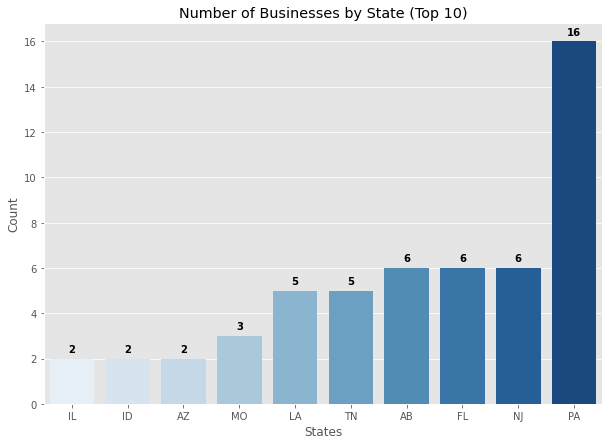

In [12]:
plt.figure(figsize=(10,7))
axis = sns.barplot(x=top10.index,y='state', data=top10, palette='Blues')
axis.set_ylabel('Count')
axis.set_xlabel('States')
axis.set_title('Number of Businesses by State (Top 10)')

for patch in axis.patches:
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy() 
        axis.text(x+width-.4, 
                y+height+0.3,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='medium') 
                
plt.show()

### There are more reviews for PA than other States

## **8. Perform Sentiment Analysis**

### Some assumptions to keep in mind

1. Negative reviews will be anything from 0 to 3 stars
2. Positive reviews will be anything from 4 to 6 stars
3. We will work with the a subset of the dataset, a sample of 125k entries
4. The expected result will be a dataframe with the review ('text' in the dataset) as well as the 'sentiment' boolean variable

In [13]:
# Import libraries
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Re-map review stars as 0 (negative) or 1 (positive) as described in the assumptions above

reviews_df['sentiment'] = reviews_df['stars'].replace({
    1: 0, # negative
    2: 0, # negative
    3: 0, # negative
    4: 1, # positive
    5: 1  # positive
}).astype(int)

In [15]:
# Sample 125k entries

sample_reviews_df = reviews_df.sample(125000).reset_index(drop=True)

In [16]:
# Create the two columns as described in the assumptions above

analysis_df = sample_reviews_df[
    ['text', 'sentiment']
]

analysis_df.head(5)

,text,sentiment
0,The array of food choices looks so wonderful. ...,1
1,Updating my review to add that my puppy is all...,1
2,I've been using A1 pharmacy for almost 10 year...,1
3,Love this place! Their curry and sushi are del...,1
4,This place is awesome! The desserts are always...,1


In [17]:
# Convert English contractions into separate words to standardize
# For instance: "wouldn't" becomes "would not"
# There is a comprehensive list of contractions accessible at https://www.sjsu.edu/writingcenter/docs/handouts/Contractions.pdf
# and a python object can be found at https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# For purposes of this project, we shall use a simple function to take care of the most common patterns

def get_canonized_contractions(word):
     word = re.sub(r"couldn’t", "could not", word)
     word = re.sub(r"wouldn’t", "would not", word)
     word = re.sub(r"won’t", "will not", word)
     word = re.sub(r"can\’t", "can not", word)
     word = re.sub(r"\’d",  " would", word)
     word = re.sub(r"\’ve", " have", word)
     word = re.sub(r"\’ll", " will", word)
     word = re.sub(r"\’re", " are", word)
     word = re.sub(r"n\’t", " not", word)
     word = re.sub(r"\’t", " not", word)
     word = re.sub(r"\’m", " am", word)
     word = re.sub(r"\’s", " is", word)
     return word

In [18]:
# Because we will use bag of words, we convert all strings to lower case
analysis_df['processed'] = analysis_df['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

# Substitute each contraction in the already lowercase review strings
analysis_df['processed'] = analysis_df['processed'].apply(lambda x: get_canonized_contractions(x))

# Keep only alphabetical chars
alpha = '[^A-Za-z]+'
analysis_df['processed'] = analysis_df['processed'].apply(lambda x: ' '.join(
    [re.sub(alpha, '', x) for x in nltk.word_tokenize(x)]
))

# Remove any extra spaces between words
analysis_df['processed'] = analysis_df['processed'].apply(lambda x: re.sub(' +', ' ', x))

# Remove stop words based on the ones downloaded from nltk
stop_words = stopwords.words('english')
analysis_df['processed'] = analysis_df['processed'].apply(lambda x: ' '.join(
    [x for x in x.split() if x not in stop_words]
))

# As a final processing step, use a lemmatizer
# This will transform words in the following way:
# dogs -> dog
# abaci -> abacus
# churches -> church
lemmatizer = WordNetLemmatizer()
analysis_df['processed'] = analysis_df['processed'].apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]
))

<ipython-input-18-edaad96e0c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['processed'] = analysis_df['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
<ipython-input-18-edaad96e0c1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['processed'] = analysis_df['processed'].apply(lambda x: get_canonized_contractions(x))
<ipython-input-18-edaad96e0c1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [19]:
# Separate into A and B for an A/B test

A = analysis_df['processed']
B = analysis_df['sentiment']

# Use sklern to split arrays into random train and test subsets
# test_size = the proportion of the dataset to include in the test split
# random_state = controls the shuffling applied to the data before applying the split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, stratify=B, random_state=45)

print('A - Training step shape', A_train.shape)
print('A - Test step shape', A_test.shape)

print('B - Training step shape', B_train.shape)
print('B - Test step shape', B_test.shape)

A - Training step shape (100000,)
A - Test step shape (25000,)
B - Training step shape (100000,)
B - Test step shape (25000,)


In [20]:
# Convert a collection of raw documents to a matrix of TF-IDF features
# that can be used as input to an estimator

vectorizer = TfidfVectorizer()
tf_A_train = vectorizer.fit_transform(A_train)
tf_A_test = vectorizer.transform(A_test)

In [21]:
# Build a report

classification = LinearSVC(random_state = 0)

# Fit the model according to the given training data
classification.fit(tf_A_train, B_train)

B_test_prediction = classification.predict(tf_A_test)

report = classification_report(B_test, B_test_prediction, output_dict = True)

pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.902303,0.935877,0.92532,0.919090,0.924875
recall,0.865845,0.954307,0.92532,0.910076,0.925320
f1-score,0.883698,0.945003,0.92532,0.914350,0.924914
support,8192.000000,16808.000000,0.92532,25000.000000,25000.000000


### **8.1 Let's run some tests and evaluations**

### Positive Review

In [22]:
# Positive review from the original dataset

analysis_df['text'][1]

"Updating my review to add that my puppy is allowed in the store and always gets a treat and a pat on the head. It's his favorite place to shop next to Doggie Style - thanks Barbour!"

In [23]:
# The same positive review, from the processed column

analysis_df['processed'][1]

'updating review add puppy allowed store always get treat pat head favorite place shop next doggie style thanks barbour'

Notice the stop words are gone and the main words stay

---



In [24]:
positive_review = analysis_df['processed'][1]

positive_review_transformed = vectorizer.transform([positive_review])

positive_review_prediction = classification.predict(positive_review_transformed)

positive_review_prediction

array([1])

**The value '1' means we predicted positive, which is correct**

### Custom Positive Review

In [25]:
# Very positive

custom_pos_review = '''
Excellent soondubu jjigae I had many coworkers from Korea recommend this restaurant, so that is how you know it is legit. I had pretty high expectations. 
I decided to try out their not spicy option. This is my first time ever trying soft tofu soup without any gochujang. It is definitely on the more salty and savory side.
I got the seafood one (Haemul) and it came with squid, mini mussels, tiny shrimp, and one prawn. Not a ton of seafood.
The soup was definitely dominated by the silken tofu, but that is how I prefer it. Of the side dishes, the pickled radish was my favorite.
Normally I see this served with fried chicken, so I was pretty delighted to see it and it was cut into strips. The kimchi was tasty, but more spicy than your typical kimchi.
'''

custom_pos_review_transformed = vectorizer.transform([custom_pos_review])

custom_pos_review_prediction = classification.predict(custom_pos_review_transformed)

custom_pos_review_prediction

array([1])

**The value '1' means we predicted positive, which is correct**

In [26]:
# Dubiously positive (4 stars or more)

custom_pos_review = '''
Fish and chips for $10.50 in the bay area. I can't complain.
Just across the street there is a disgusting seafood restaurant.
They don't seem to even wash their hands, and seafood is not fresh.
But this place lives up to the expectations. Good food, gotta love it
'''

custom_pos_review_transformed = vectorizer.transform([custom_pos_review])

custom_pos_review_prediction = classification.predict(custom_pos_review_transformed)

custom_pos_review_prediction

array([1])

**The value '1' means we predicted positive, which is correct**

### Negative Review

In [27]:
# Negative review from the original dataset

analysis_df['text'][6]

'The service was really well meaning, but awkward. Our table was the worst in the whole restaurant, even though there were many empty tables around us. The silverware was not cleaned properly, and had hair in it as well. The one redeeming quality was that the food was decent, but it was not spectacular.'

In [28]:
# The same negative review, from the processed column

analysis_df['processed'][6]

'service really well meaning awkward table worst whole restaurant even though many empty table around u silverware cleaned properly hair well one redeeming quality food decent spectacular'

In [29]:
negative_review = analysis_df['processed'][1]

negative_review_transformed = vectorizer.transform([negative_review])

negative_review_prediction = classification.predict(negative_review_transformed)

negative_review_prediction

array([1])

**The value '1' means we predicted positive, which is incorrect**



### Custom Negative Review

In [30]:
# Very negative

custom_negative_review = '''
I was highly disappointed on my last visit there last night.
May have a talk with the manager. Use to love this place.
Now thinking I don't need to go here again. They were very busy.
Very disorganized and need stronger management leadership.
Food was overcooked and Very Small portions.
Added roasted asparagus for $3 and only got 3 stocks!
Just overall a bad experience.
'''

custom_negative_review_transformed = vectorizer.transform([custom_negative_review])

custom_negative_review_prediction = classification.predict(custom_negative_review_transformed)

custom_negative_review_prediction

array([0])

**The value '0' means we predicted negative, which is correct**


In [31]:
# Dubiously negative (less than 3 stars)

custom_negative_review = '''
Updated my reviews. Food is still good. But they keep missing side orders.
At least twice this happened to me. It's annoying but I keep coming anyway
'''

custom_negative_review_transformed = vectorizer.transform([custom_negative_review])

custom_negative_review_prediction = classification.predict(custom_negative_review_transformed)

custom_negative_review_prediction

array([0])

**The value '0' means we predicted negative, which is correct**


### Custom Neutral Review

In [32]:
# Neutral

custom_neutral_review = '''
This place is alright. Price is okay and food is normal. Not bad, not great. Service is pretty good though.
'''

custom_neutral_review_transformed = vectorizer.transform([custom_neutral_review])

custom_neutral_review_prediction = classification.predict(custom_neutral_review_transformed)

custom_neutral_review_prediction

array([0])

Although it was neutral leaning towards positive, the model predicted '0' negative

## Analysis




In [33]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.902303,0.935877,0.92532,0.919090,0.924875
recall,0.865845,0.954307,0.92532,0.910076,0.925320
f1-score,0.883698,0.945003,0.92532,0.914350,0.924914
support,8192.000000,16808.000000,0.92532,25000.000000,25000.000000


1.  This model has accuracy of ~92%

2.  Negative reviews were more difficult to predict

    Positive - 93% accuracy

    Negative - 89% accuracy

3. This model accurately predicted 2 custom positive reviews, and 1 negative review, and tends to lean towards negative given a neutral review

# 9. Environment take down


In [34]:
# Uncomment and run the code below to remove downloaded files from the environment

# !rm yelp_businesses.json
# !rm yelp_reviews.json